In [30]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/ubuntu/All-the-news/newsSentiment-bab92a0eb8ab.json"

In [102]:
import matplotlib, matplotlib.pyplot

In [31]:
os.getcwd()

'/home/ubuntu/All-the-news'

In [32]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

In [45]:
import pandas as pd

In [176]:
articles1 = pd.read_csv('articles1.csv')
articles2 = pd.read_csv('articles2.csv')
articles3 = pd.read_csv('articles2.csv')

In [177]:
articles_full = pd.concat([articles1, articles2,articles3], ignore_index=True)

In [168]:
articles_full = articles_full.dropna(subset = ['title', 'content','date'])

In [171]:
len(articles_full)

149996

In [172]:
def get_articles_for_IntOrg(IntOrg_string,dataframe):
    
    i = 0
    IO_indices = []
    for title in dataframe.title:
        if (str(IntOrg_string) + ' ') in str(title):
            IO_indices.append(i)
        i += 1
    
    

    articles_for_IntOrg = dataframe.iloc[IO_indices]
    return articles_for_IntOrg

In [173]:
def sample_analyze_sentiment(text_content):
    """
    Analyzing Sentiment in a String

    Args:
      text_content The text content to analyze
    """

    client = language_v1.LanguageServiceClient()

    # text_content = 'I am so happy and joyful.'

    # Available types: PLAIN_TEXT, HTML
    type_ = enums.Document.Type.PLAIN_TEXT

    # Optional. If not specified, the language is automatically detected.
    # For list of supported languages:
    # https://cloud.google.com/natural-language/docs/languages
    language = "en"
    document = {"content": text_content, "type": type_, "language": language}

    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = enums.EncodingType.UTF8

    response = client.analyze_sentiment(document, encoding_type=encoding_type)
    # Get overall sentiment of the input document
    #print(u"Document sentiment score: {}".format(response.document_sentiment.score))
    #print(
       ### u"Document sentiment magnitude: {}".format(
            
        
    # Get sentiment for all sentences in the document
    return response.document_sentiment.score

In [181]:
def plot_sentiment_for_IntOrg(IntOrg_string,dataframe):
    articles_for_IntOrg = get_articles_for_IntOrg(IntOrg_string,dataframe)
    print('The number of articles with ', IntOrg_string, ' in the title is ', len(articles_for_IntOrg))
    articles_for_IntOrg['sentiment_score'] = articles_for_IntOrg['content'].apply(sample_analyze_sentiment)
    articles_for_IntOrg['Datetime'] = articles_for_IntOrg['date'].astype('datetime64[ns]') 
    articles_for_IntOrg = articles_for_IntOrg.dropna(subset = ['Datetime'])
    articles_for_IntOrg = articles_for_IntOrg.sort_values(by=['Datetime'])
    values = list(articles_for_IntOrg.sentiment_score)
    dates = matplotlib.dates.date2num(list(articles_for_IntOrg.Datetime))
    matplotlib.pyplot.figure(figsize=(10,5))
    matplotlib.pyplot.plot_date(dates, values, ls='-')
    title = "Sentiment for the " + IntOrg_string
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.xlabel("Date of article")
    matplotlib.pyplot.ylabel("Sentiment of article")
    matplotlib.pyplot.savefig(IntOrg_string + '.png',format='png')

In [183]:
IntOrg_string = "NAFTA"

In [184]:
IntOrgList = ['WHO','UNICEF','UNESCO','World Bank','World Trade Organization', 'G8', 'UN', 'NATO', 'EU']

The number of articles with  WHO  in the title is  28


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


The number of articles with  UNICEF  in the title is  0
The number of articles with  UNESCO  in the title is  9
The number of articles with  World Bank  in the title is  0
The number of articles with  WTO  in the title is  0
The number of articles with  G8  in the title is  0
The number of articles with  UN  in the title is  253
The number of articles with  NATO  in the title is  97
The number of articles with  EU  in the title is  253


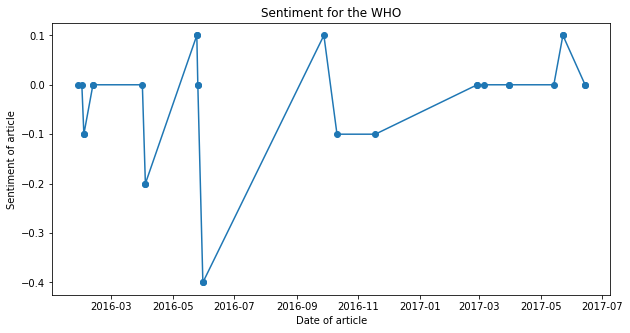

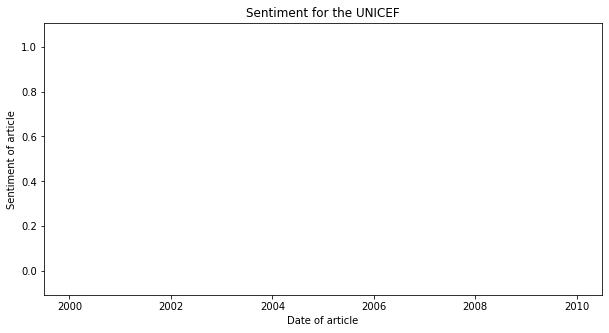

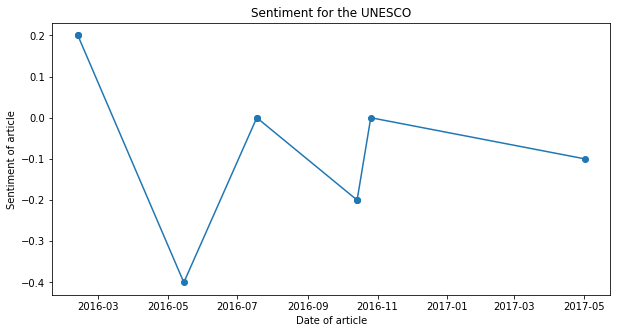

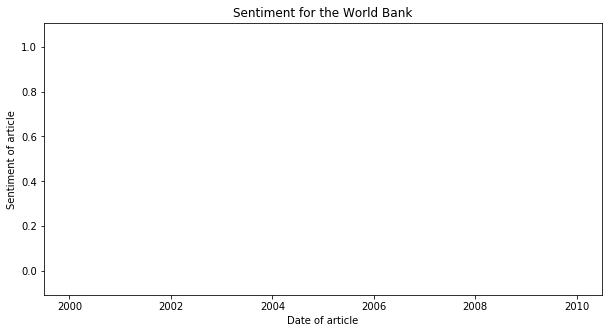

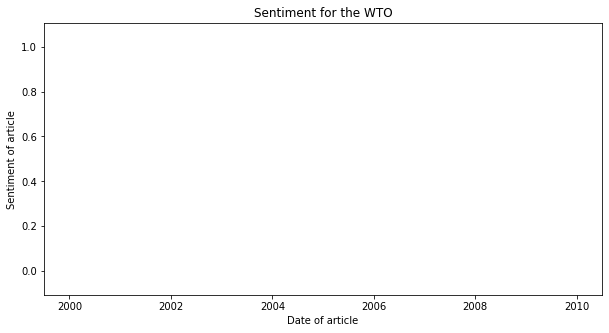

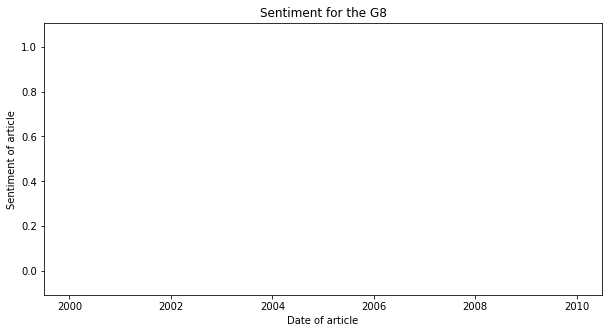

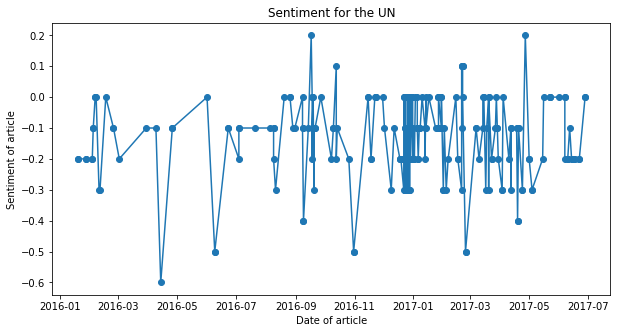

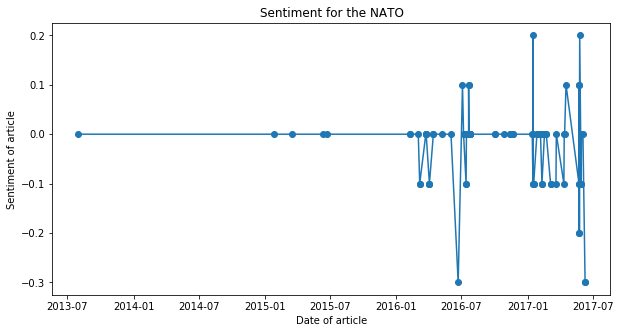

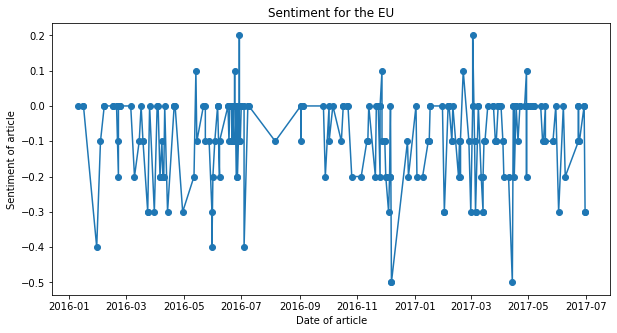

In [185]:
for IntOrg_string in IntOrgList:
    plot_sentiment_for_IntOrg(IntOrg_string,articles_full)

In [187]:
IntOrgList2 = ['World Trade Organization']

The number of articles with  World Trade Organization  in the title is  0


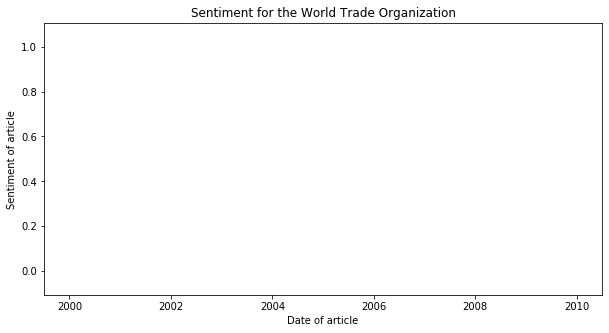

In [188]:
for IntOrg_string in IntOrgList2:
    plot_sentiment_for_IntOrg(IntOrg_string,articles_full)